In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ConvLSTM 
> Conv lstm model

In [23]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [30]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'Quadro RTX 8000'

In [24]:
PATH = Path.cwd().parent/'data'
Path.BASE_PATH = PATH

IMAGE_PATH = PATH/'UCF-101-frames'
SPLIT_PATH = PATH/'ucfTrainTestlist'

In [25]:
files = get_sequence_paths(IMAGE_PATH)

In [38]:
seq_len = 48
image_size = 128
assert len(files)/8 == len(files)//8

In [39]:
#slow
val_idxs = get_split_idxs()

## Train

In [40]:
dls = get_action_dataloaders(files, bs=64, image_size=image_size, seq_len=seq_len, val_idxs=val_idxs, random_sample=False)

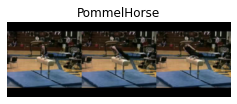

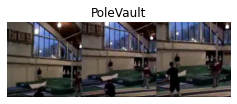

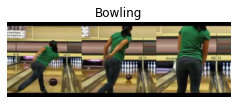

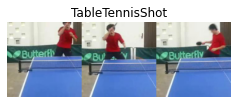

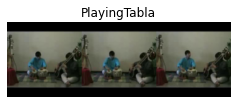

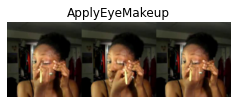

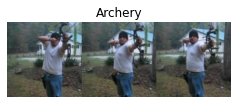

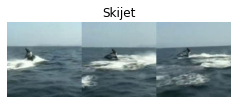

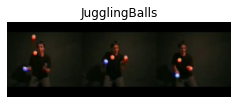

In [41]:
dls.show_batch()

In [42]:
model = ConvLSTM(num_classes=dls.c, hidden_dim=256)

In [43]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, cbs=[ModelResetter()], splitter=convlstm_splitter).to_fp16()
learn.freeze()

In [44]:
learn.lr_find()

ValueError: Caught ValueError in DataLoader worker process 8.
Original Traceback (most recent call last):
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 107, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/utils.py", line 278, in chunked
    res = list(itertools.islice(it, cs))
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 120, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 126, in create_item
    def create_item(self, s):  return next(self.it) if s is None else self.dataset[s]
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 289, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 289, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 266, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 229, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/transform.py", line 187, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/transform.py", line 140, in compose_tfms
    x = f(x, **kwargs)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/transform.py", line 72, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/transform.py", line 82, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/transform.py", line 86, in _do_call
    return x if f is None else retain_type(f(x, **kwargs), x, f.returns_none(x))
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/fastcore/dispatch.py", line 98, in __call__
    return f(*args, **kwargs)
  File "/home/tcapelle/SteadySun/action_recognition/nbs/action_recognition/core.py", line 111, in encodes
    first_idx = random.randint(0, n_frames-self.seq_len)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/random.py", line 222, in randint
    return self.randrange(a, b+1)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/random.py", line 200, in randrange
    raise ValueError("empty range for randrange() (%d,%d, %d)" % (istart, istop, width))
ValueError: empty range for randrange() (0,-1, -1)


In [36]:
learn.fit_one_cycle(6, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.169375,2.190266,0.452815,01:00
1,1.778277,2.677141,0.401533,01:00
2,1.219248,2.219559,0.469997,01:01
3,0.715683,1.888066,0.564367,01:00
4,0.427360,1.749254,0.606133,01:01
5,0.278095,1.737542,0.605340,01:00


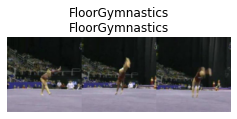

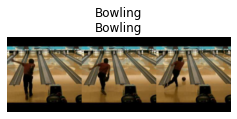

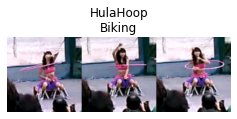

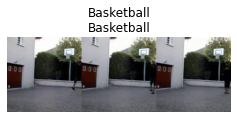

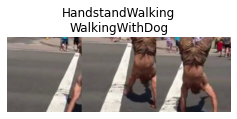

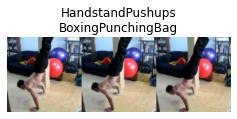

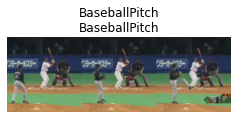

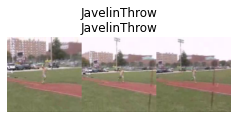

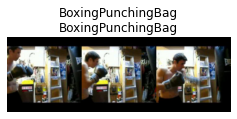

In [37]:
learn.show_results()